# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms with can discover patterns in visual data. Such as the camera of  self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the food101 dataset

However, we've modified it to only use two classes (pizza🍕 and steaks🥩) using the image data modification.

> **🔑Note:** We start from smaller dataset so we can experiment quickly and figure what works before scaling up.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
import os

## Inspect the data (become one with it)

A very crucial at the begining of any ML project is becoming one with data.

In [2]:
!ls pizza_steak/train/steak

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [3]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [4]:
# Another way to find out how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_images_train

750

To visualize our images, first let's get the class namesprogrammatically.

In [111]:
# Get the calss name programmatically
data_dir = pathlib.Path("pizza_steak/train")
calss_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Create a list of class name
print(calss_names)

['.DS_Store' 'pizza' 'steak']


In [6]:
# Let's visualize our images

def view_random_image(target_dir, target_class):
    # Set the target directory
    target_floder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_floder), 1)

    # Read in the image and plot it
    img = mpimg.imread(target_floder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")

    return img


Image shape: (512, 289, 3)


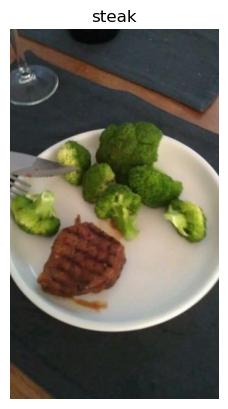

In [7]:
# View a random image from training dataset

img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [8]:
# Viewthe img shape
img.shape # Rwturnd width, height, RGB-coclor channel

(512, 289, 3)

>  Normalization to our img between 0&1 🥶 (Tensorflow got function for us)

## End-to-End example 

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our image
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

Good site to reference: 🚅 [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

In [9]:
# Set the seed
tf.random.set_seed(42)

# Preprocess the data (get all value between 0&1)
train_datagen = IDG(rescale=1./255)
valid_dadagen = IDG(rescale=1./255)

# Set up path to data directory
train_dir = "/Users/psyduck/NeuralNetwork_SelfLearn/pizza_steak/train/"
test_dir = "/Users/psyduck/NeuralNetwork_SelfLearn/pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_dadagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (Same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5, 
                        verbose=1, 
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Epoch 1/5


2024-01-31 20:28:33.862074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-01-31 20:28:33.868645: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - ETA: 0s - loss: 0.5983 - accuracy: 0.6727

2024-01-31 20:28:44.987617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 13s 267ms/step - loss: 0.5983 - accuracy: 0.6727 - val_loss: 0.3889 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 12s 265ms/step - loss: 0.4327 - accuracy: 0.8013 - val_loss: 0.3559 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 12s 254ms/step - loss: 0.4185 - accuracy: 0.8060 - val_loss: 0.3669 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 12s 253ms/step - loss: 0.3872 - accuracy: 0.8313 - val_loss: 0.3559 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 12s 253ms/step - loss: 0.3469 - accuracy: 0.8507 - val_loss: 0.4050 - val_accuracy: 0.8220


In [10]:
# Get model summry
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before ✈

Let's replicate the model we've built in the previous section to see if works with our image data.

The model we're building is from tensorflow playground: [PlayGround](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.81772&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [11]:
# Set random seed
tf.random.set_seed(42)

# Build a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        verbose=1)



Epoch 1/5


2024-01-31 20:29:34.987894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.7652 - accuracy: 0.5127

2024-01-31 20:29:37.905446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 4s 79ms/step - loss: 0.7652 - accuracy: 0.5127 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 77ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 75ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 76ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 76ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [12]:
# Get a summary of model2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Depite having 20X more parameters than our CNN (model_1), model_2 peforms terribly... let's try improve it.

In [13]:
# Set random seed
tf.random.set_seed(42)

# Build a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.001),
    metrics=["accuracy"]
)

# Fit the model
history_3 = model_3.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        verbose=1)



Epoch 1/5


/Users/psyduck/anaconda3/lib/python3.11/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2024-01-31 20:29:53.236434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 3.2673 - accuracy: 0.6160

2024-01-31 20:29:56.244159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 4s 81ms/step - loss: 3.2673 - accuracy: 0.6160 - val_loss: 2.6891 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 4s 78ms/step - loss: 0.7632 - accuracy: 0.7033 - val_loss: 1.4961 - val_accuracy: 0.5420
Epoch 3/5
47/47 [==============================] - 4s 78ms/step - loss: 0.6442 - accuracy: 0.7380 - val_loss: 0.4394 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 4s 77ms/step - loss: 0.5322 - accuracy: 0.7593 - val_loss: 0.5914 - val_accuracy: 0.7260
Epoch 5/5
47/47 [==============================] - 4s 79ms/step - loss: 0.5261 - accuracy: 0.7640 - val_loss: 0.5536 - val_accuracy: 0.7340


In [14]:
# Get a summary of model3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data
2. Preprocess the data (prepare it for our model, the main step here was scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repaet until satisfied

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


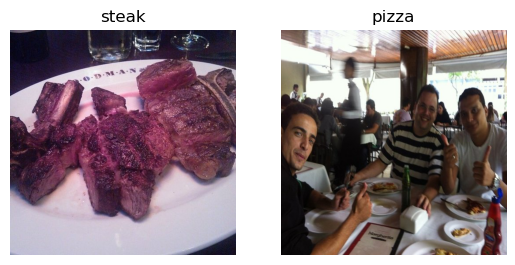

In [15]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data(prepare it for a model)

In [16]:
# Difine directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our nect step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images (or more) might not fit into the memory of processor (GPU).
2. Trying to learn the patterns in 10000 images in one hit could resultin the model not being able to learn very well.

> Why 32? Universal rules.  🌍

In [17]:
# Create train and test data generators and rescale the data
train_datagen = IDG(rescale=1/255.)
test_datagen = IDG(rescale=1/255.)

In [18]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224), # Target size of image (Height, Width)
                                               class_mode="binary", # type of data you are working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [20]:
# How many batches are there
len(train_data) == round(1500/32)

True

In [21]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [22]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Creating a model 🖥 (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when begining a mechine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑**Note:** In deep learning there are infinate amount of architectures you could create. So one of the best ways to started is to start with something simple and see if it works on your data and then introduce complexity as required.

In [23]:
# Make the creating our model a little easier
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [24]:
# Create a model  this will be our baseline a three layers (convolutional network)

# Random seed
tf.random.set_seed(42)

"""
Filters: Decide how many filters should pass over an input tensor.
Kernel Size: Lower values learn smaller fetures.
Padding: "same" or "valid", if "same" input_shape=output_shape vice versa.
Stride: The number of steps a filtertakes across an image at a time. (每次移動幾格-stride越小越細緻)
"""

# Build a model
model_4 = Sequential([
    Conv2D(filters=10, kernel_size = (3, 3), padding="valid", activation="relu", input_shape=(224, 224, 3)), # Input layers (specifiy input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (working with binary classifiaction so only one output neuron)
])

In [25]:
# Compile a model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [26]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [27]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [28]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2024-01-31 20:30:12.366114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.7481 - accuracy: 0.6027

2024-01-31 20:30:25.079279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 14s 303ms/step - loss: 0.7481 - accuracy: 0.6027 - val_loss: 0.6007 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 14s 301ms/step - loss: 0.4630 - accuracy: 0.8000 - val_loss: 0.4685 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 14s 300ms/step - loss: 0.2526 - accuracy: 0.9173 - val_loss: 0.3746 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 14s 300ms/step - loss: 0.1038 - accuracy: 0.9707 - val_loss: 0.4312 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 14s 299ms/step - loss: 0.0327 - accuracy: 0.9967 - val_loss: 0.6145 - val_accuracy: 0.7960


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

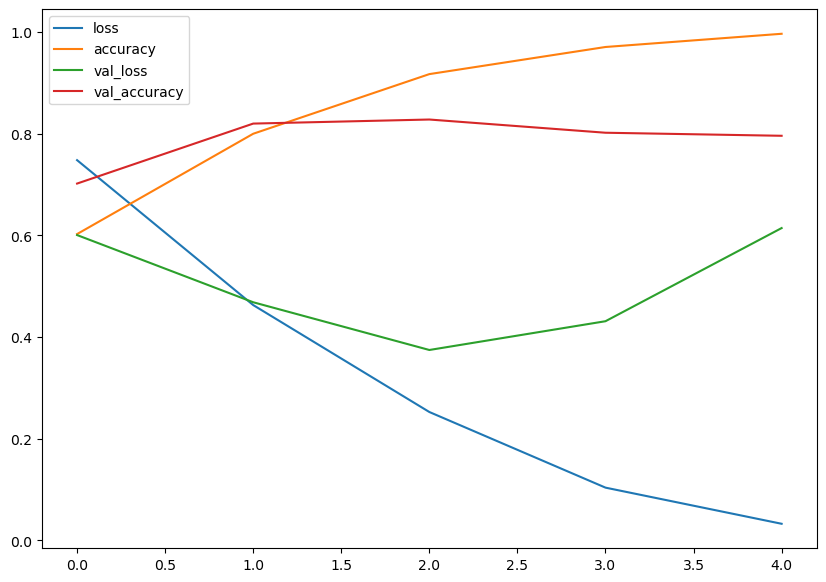

In [29]:
# Let's plot the training curve
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [30]:
# Plot the validation and training curve separately
def plot_loss (history):
    """
    returns separate loss curves and validation curves
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) # How many epochs did we run for

    # Plot loss
    plt.figure(figsize=(10, 7))
    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="val loss")
    plt.title("Losss")
    plt.xlabel("Epochs")
    plt.ylabel("Losses")
    plt.legend()

    # Plot accuracy
    plt.figure(figsize=(10, 7))
    plt.plot(epochs, accuracy, label="accuracy")
    plt.plot(epochs, val_accuracy, label="val accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    

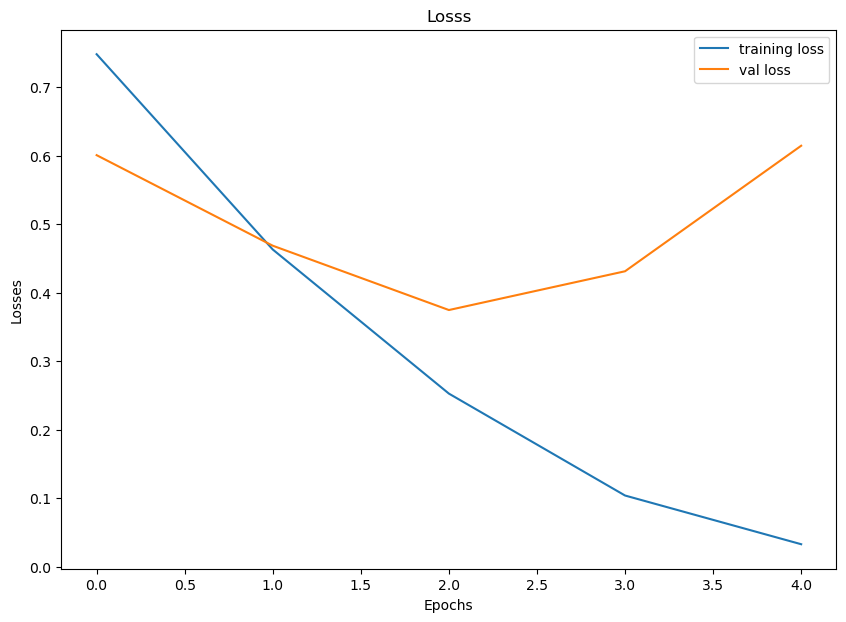

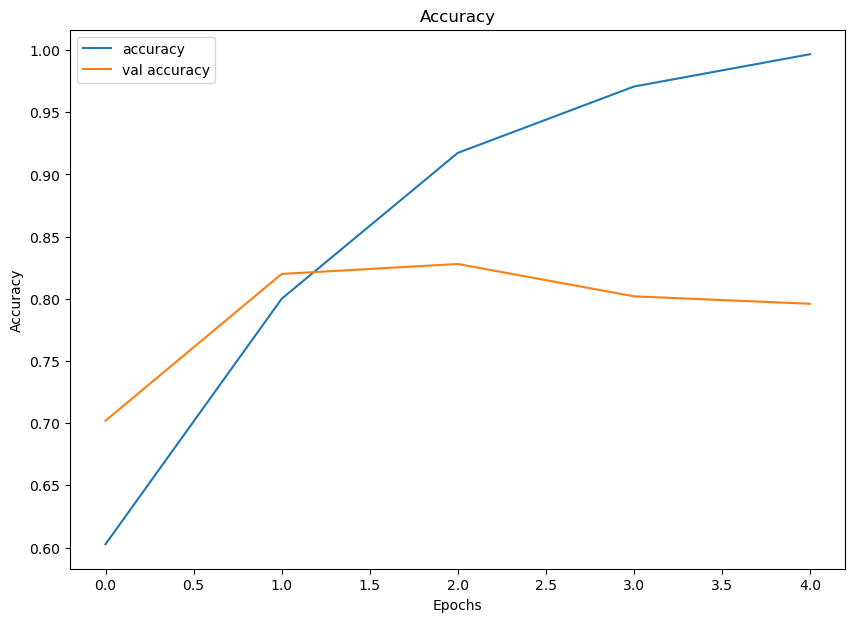

In [31]:
# Check out the loss and accuracy of model4
plot_loss(history_4)

🔑**Note:** When a model's **Validation loss starts to increase**, it is likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in training dataset *too well* and thus the model'sability to generalize to unseen data will be diminished.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to reduce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularizaion layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reduce overfitting is also known as **regularization**.

In [32]:
# Create the model (this is going to be our new baseline)
model_5 = tf.keras.Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

> MaxPooling will return the most important feature

In [33]:
# Set seed
tf.random.set_seed(42)

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2024-01-31 20:31:23.769931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6087 - accuracy: 0.6540

2024-01-31 20:31:28.843216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 6s 125ms/step - loss: 0.6087 - accuracy: 0.6540 - val_loss: 0.4237 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4404 - accuracy: 0.8060 - val_loss: 0.3830 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4060 - accuracy: 0.8207 - val_loss: 0.3142 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.3895 - accuracy: 0.8267 - val_loss: 0.3497 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3670 - accuracy: 0.8447 - val_loss: 0.3411 - val_accuracy: 0.8560


In [35]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [36]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


> Mode5 out performed the Model4, even with 5times lesser parameters. ☄

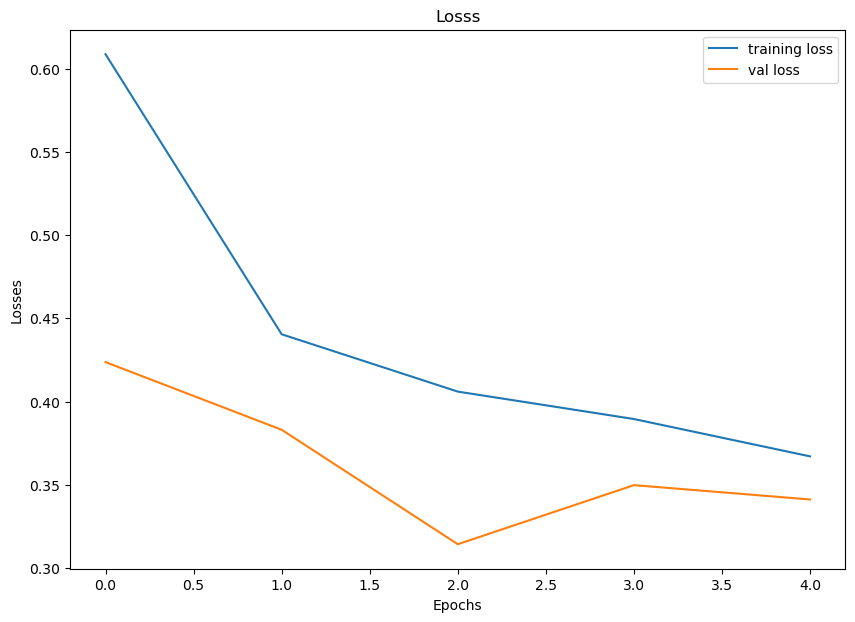

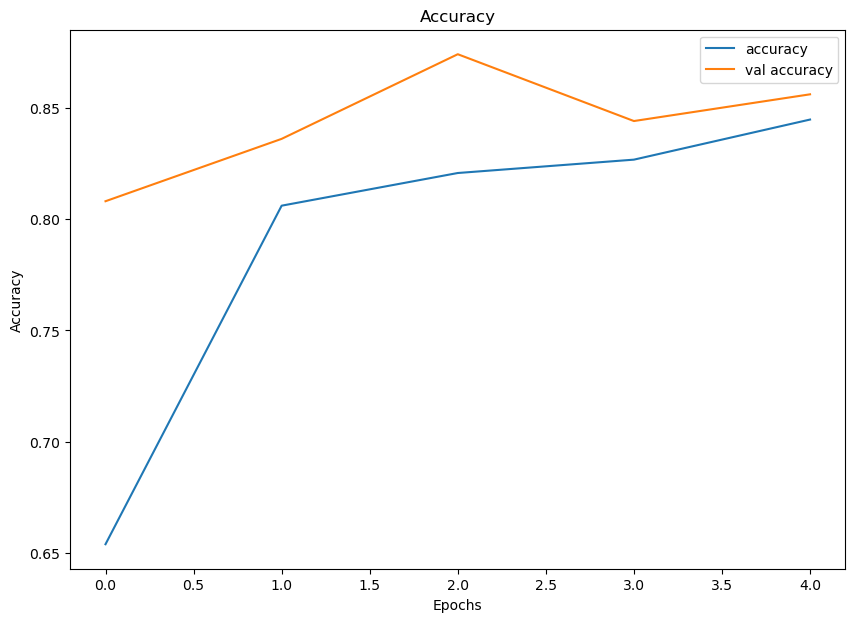

In [37]:
# Plot the loss curves
plot_loss(history_5)

### Opening our bag of tricks and finding data augmentation

**Some names used in IDG**

* Rotation Range
    - How much do you want to rotate an image
* Shaer Range
    - How much do you want to shear an image
* Horizontal Flip
    - Do ypu want to flip an image


In [47]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augemntation = IDG(rescale=1/225.,
                                rotation_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.3,
                                horizontal_flip=True)

# Create ImageDataGenerator without augmentation
train_datagen = IDG(rescale=1/225.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = IDG(rescale=1/255.)

> 🤖**Question:** What is data augmentation?

>Data agumentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar. 

> 🤖 **Question:** If without shuffling the data, what is behind the science?

> It will read pizza first, compile it all, then read steak. Hence, the metric will not be as precise as we thought, or even nearly 50% only.

In [75]:
"""
Ususally suffle=True is a good stuff!!
"""

# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augemntation.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # Don't shuffle as False

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) # Don't shuffle as False

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.


Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally, let's visualize some augmented data!!!

In [76]:
# Get sample data batched
images, labels = train_data.next()
augmented_images, augmentes_labels = train_data_augmented.next() # Labels are not augmented... only data (images)

Showing random image number 0


(-0.5, 223.5, 223.5, -0.5)

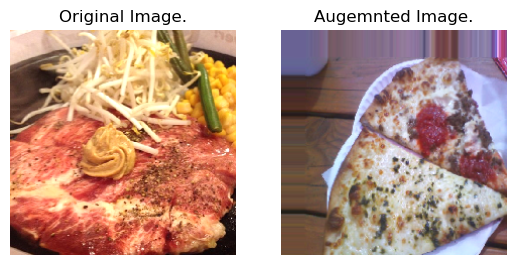

In [77]:
# Show the original image ang augmented image
random_number = random.randint(0, 32) # Our batch size are 32
print(f"Showing random image number {random_number}")

plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title("Original Image.")
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title("Augemnted Image.")
plt.axis(False)

In [78]:
# Set seed
tf.random.set_seed(42)

# Build a model
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile amodel
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
    
# Fit the model
history_7 = model_7.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data) 
)

Epoch 1/5


2024-01-31 21:41:49.961223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6420 - accuracy: 0.6167

2024-01-31 21:42:00.513479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 12s 243ms/step - loss: 0.6420 - accuracy: 0.6167 - val_loss: 0.5427 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 11s 239ms/step - loss: 0.5478 - accuracy: 0.7300 - val_loss: 0.4840 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 11s 241ms/step - loss: 0.5033 - accuracy: 0.7473 - val_loss: 0.3943 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 11s 243ms/step - loss: 0.4918 - accuracy: 0.7760 - val_loss: 0.3618 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4613 - accuracy: 0.7833 - val_loss: 0.3419 - val_accuracy: 0.8640


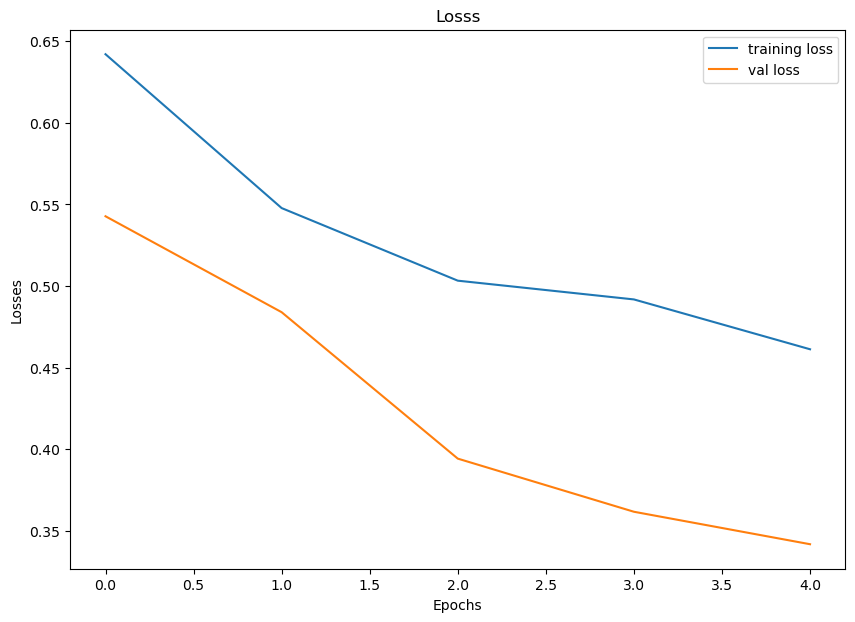

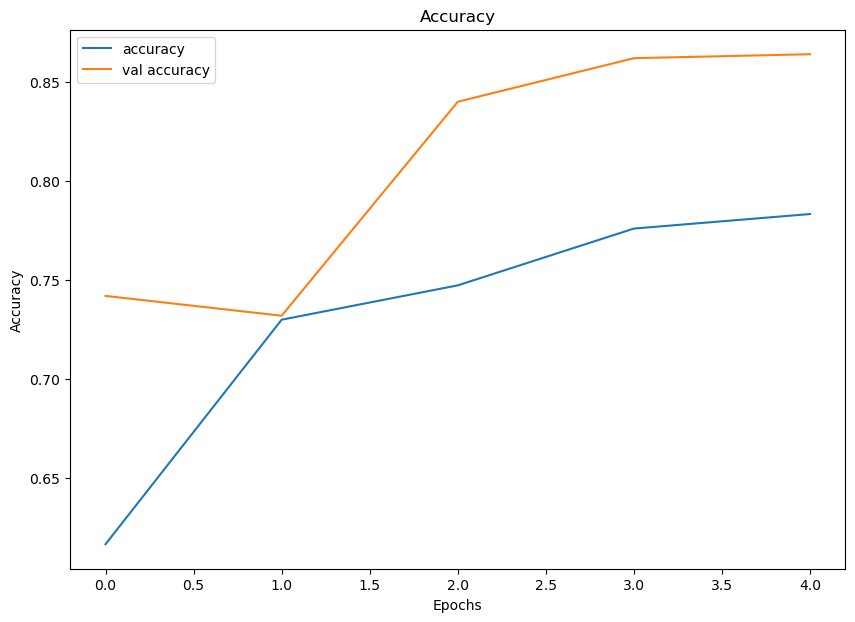

In [79]:
# Ceck model training curves
plot_loss(history_7)

### 7. Repeat util satisfied

Since we've already beatten our baseline, there are few things we could try to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D layers`)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunity to learn)
* Use `transfer learning` to leverage what another model has learn and adjust it for our own use case

## Making a prediction with our trained model on our own custom data

In [82]:
# Classes we are working with
print(calss_names)

['.DS_Store' 'pizza' 'steak']


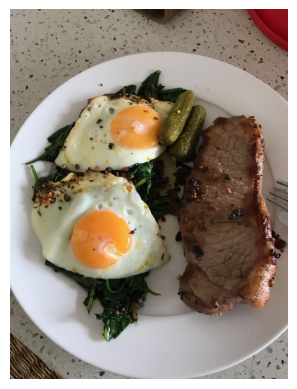

In [89]:
# View our example image
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [94]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> **Note:** When you train a neural network, you want to make aprediction with your own custom data (or new data) is preprocessed into the same format as your model trained on.

In [96]:
# Create a function to import an image and resize it is able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads image from file name.
    Turns it into tensor.
    Reshape it to img_shape.
    """

    # Read in image
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor
    img = tf.image.decode_jpeg(img)

    # Resize the image
    img = tf.image.resize(img, [img_shape, img_shape])
    
    # Rescale the image
    img = img/255.

    return img

In [99]:
steak_image = load_and_prep_image("03-steak.jpeg")
steak_image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [102]:
pred = model_7.predict(tf.expand_dims(steak_image, axis=0))

1/1 [==============================] - 0s 15ms/step


> Looks like our coustom image is being put through our model, however, it output the prediction probability.

In [ ]:
# Clean the class name
calss_names_test = calss_names[1 :]

In [115]:
# We can index the predictied calss by rounded the prediction
pred_class = calss_names_test[int(tf.round(pred))]
pred_class

'steak'

In [132]:
def pred_and_plot(model, filename, calss_names_test):
    """
    Import our image located at file name.
    Prediction with model.
    Match the class name.
    """
    # Load the image and pre-process
    img = load_and_prep_image(filename, img_shape=224)

    # Make the prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Got the labes
    pred_class = calss_names_test[int(tf.round(pred))]

    plt.figure(figsize=(10, 7))
    plt.imshow(img)
    plt.title(f"Prediction:{pred_class}")
    plt.axis(False);
    


1/1 [==============================] - 0s 11ms/step


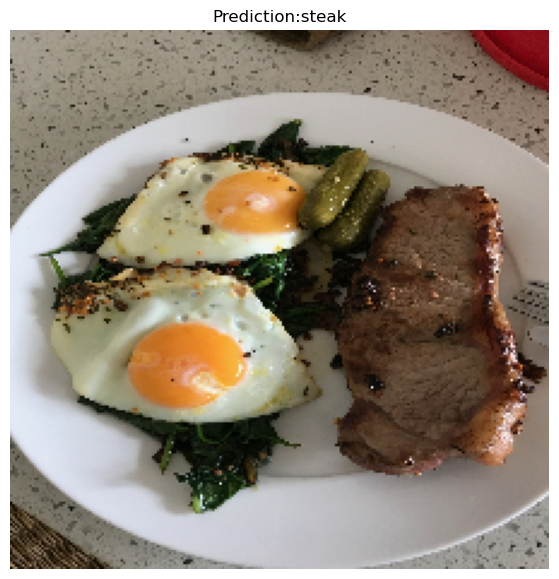

In [133]:
pred_and_plot(model_7, "03-steak.jpeg", calss_names_test=calss_names_test)

1/1 [==============================] - 0s 11ms/step


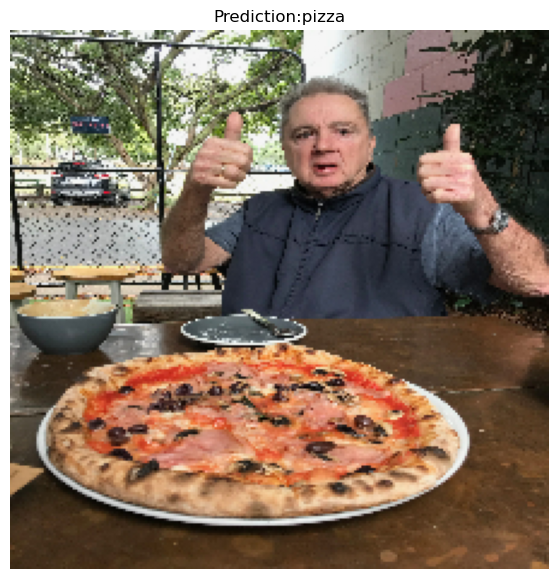

In [134]:
pred_and_plot(model_7, "03-pizza-dad.jpeg", calss_names_test=calss_names_test)